## 0.Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import glob
import seaborn as sns

## 1. Load Dataset

In [2]:
dir = 'dataset'
listdir = os.listdir(dir)

print(listdir)
print("The number of dataset :", len(listdir))

['B05_discharge_soh.csv', 'B07_discharge_soh.csv', 'B18_discharge_soh.csv', 'B33_discharge_soh.csv', 'B34_discharge_soh.csv', 'B46_discharge_soh.csv', 'B47_discharge_soh.csv', 'B48_discharge_soh.csv']
The number of dataset : 8


In [3]:
num = ['B05', 'B07', 'B18', 'B33', 'B34', 'B46', 'B47', 'B48']
for i in range(len(listdir)):
    vector = np.zeros((1,3))
    path = os.path.join(os.getcwd(), 'dataset/', num[i] + '_discharge_soh.csv')
    csv = pd.read_csv(path)
    df = pd.DataFrame(csv)
    
    vec = df[['cycle', 'capacity', 'SOH']]
    
    globals()['data_{}'.format(num[i])] = vec

In [4]:
data = pd.read_csv('dataset/B05_discharge_soh.csv')
df = pd.DataFrame(data)
df

,terminal_voltage,terminal_current,temperature,charge_current,charge_voltage,time,capacity,cycle,SOH
0,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487,1,0.928244
1,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487,1,0.928244
2,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487,1,0.928244
3,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487,1,0.928244
4,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487,1,0.928244
...,...,...,...,...,...,...,...,...,...
50280,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312,1.325079,168,0.662540
50281,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062,1.325079,168,0.662540
50282,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828,1.325079,168,0.662540
50283,3.587336,0.001219,34.565580,0.0006,0.000,2810.640,1.325079,168,0.662540


In [5]:
data_B05  ## result

,cycle,capacity,SOH
0,1,1.856487,0.928244
1,1,1.856487,0.928244
2,1,1.856487,0.928244
3,1,1.856487,0.928244
4,1,1.856487,0.928244
...,...,...,...
50280,168,1.325079,0.662540
50281,168,1.325079,0.662540
50282,168,1.325079,0.662540
50283,168,1.325079,0.662540


In [6]:
for i in range(len(listdir)):
    print("Shape of data :", np.shape(globals()['data_{}'.format(num[i])]))

Shape of data : (50285, 3)
Shape of data : (50285, 3)
Shape of data : (34866, 3)
Shape of data : (42200, 3)
Shape of data : (45909, 3)
Shape of data : (23478, 3)
Shape of data : (23478, 3)
Shape of data : (23478, 3)


## 2. Visualization of capacity

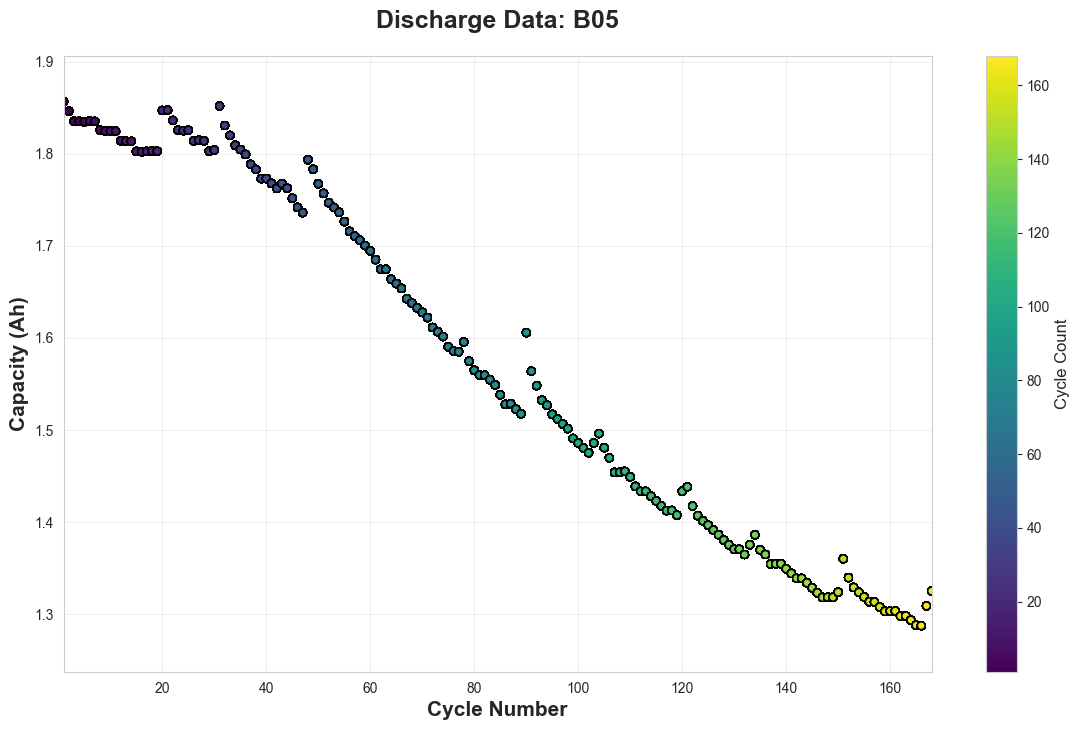

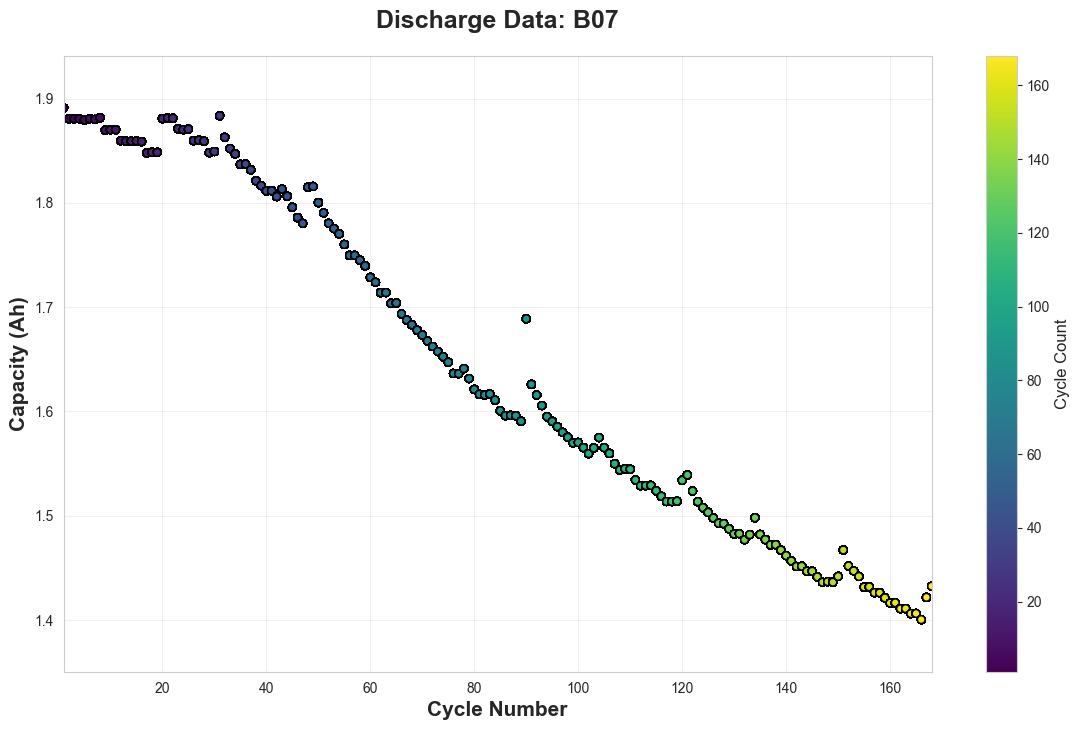

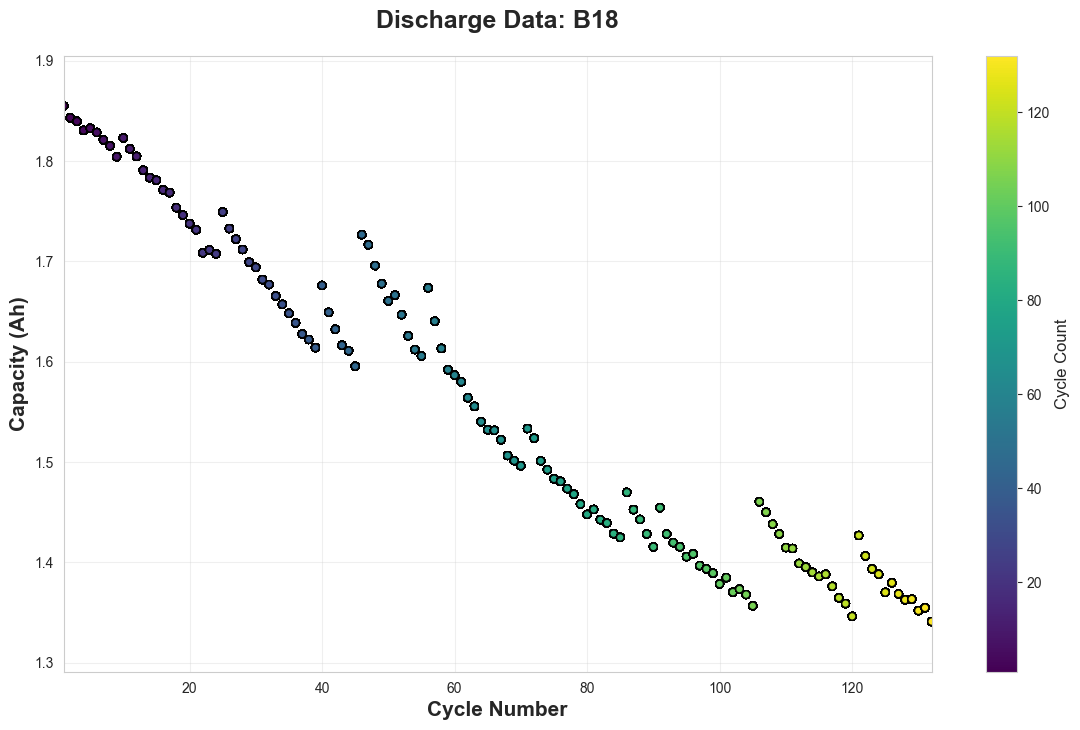

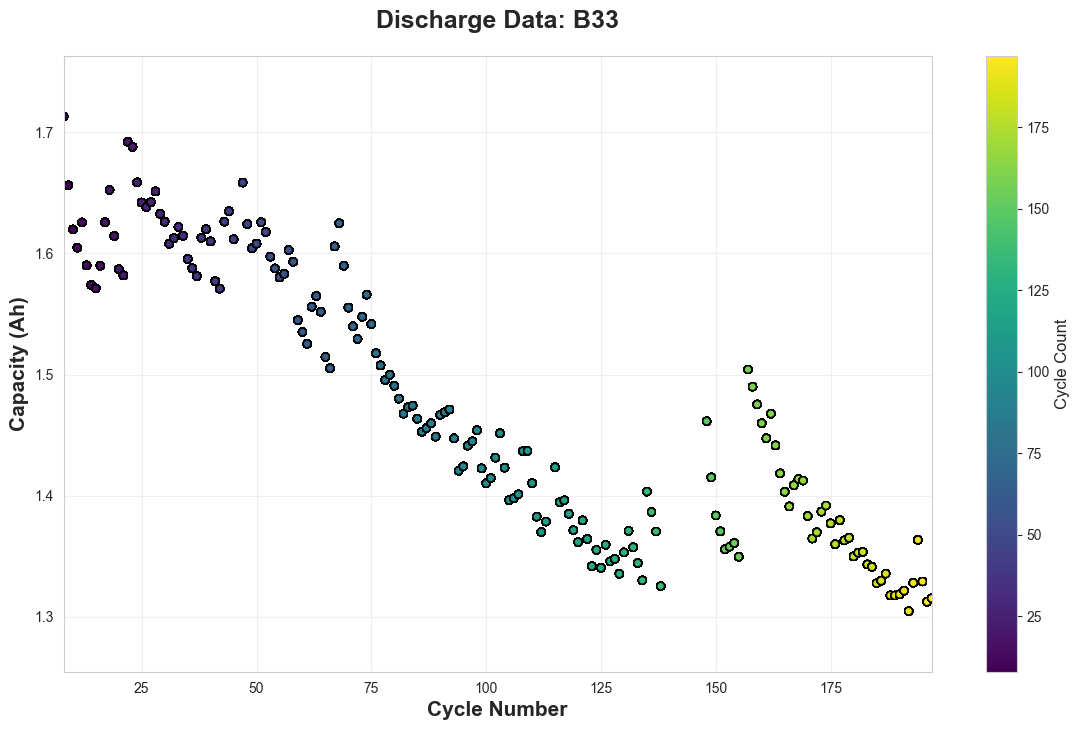

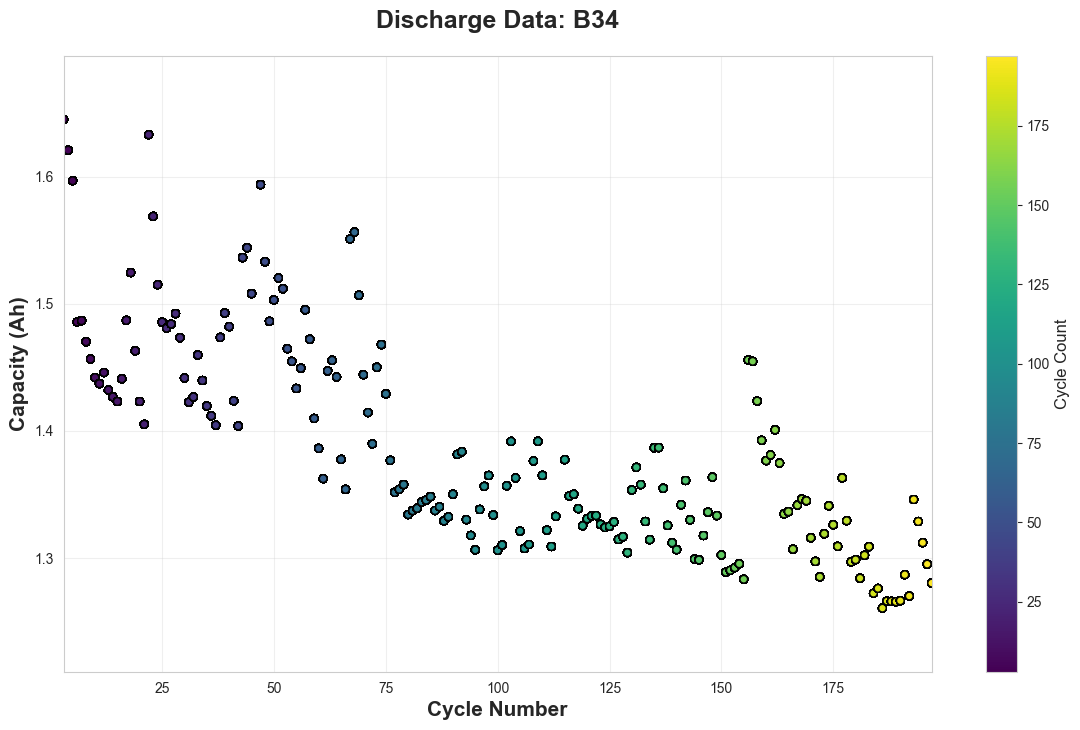

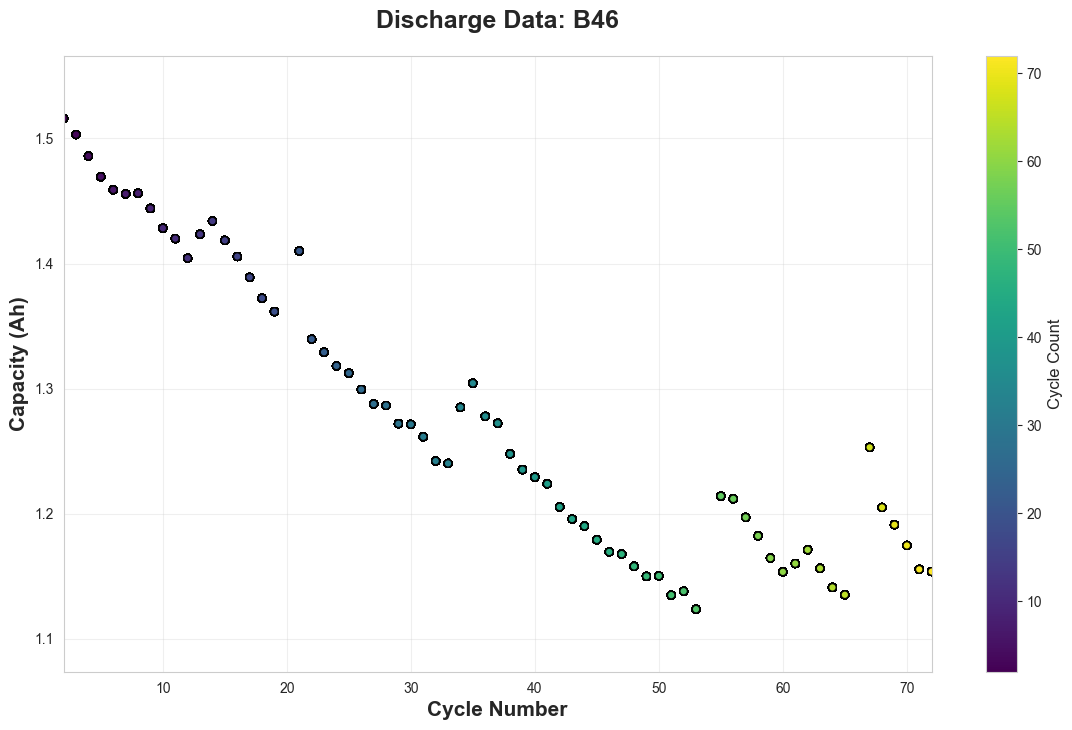

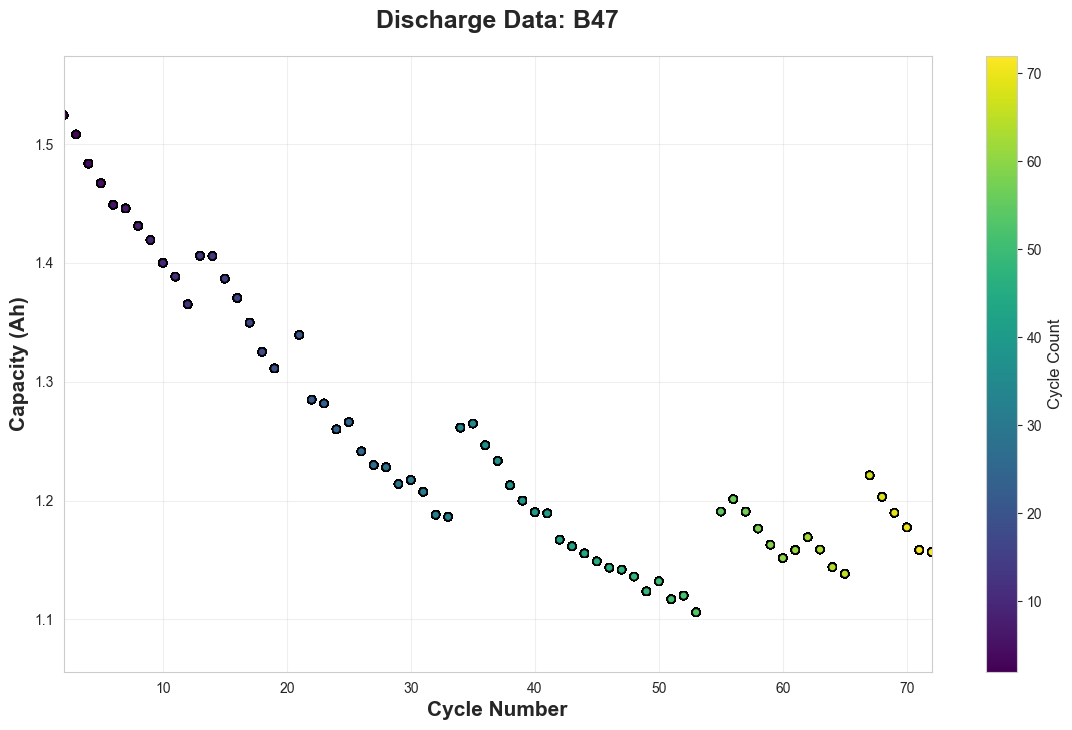

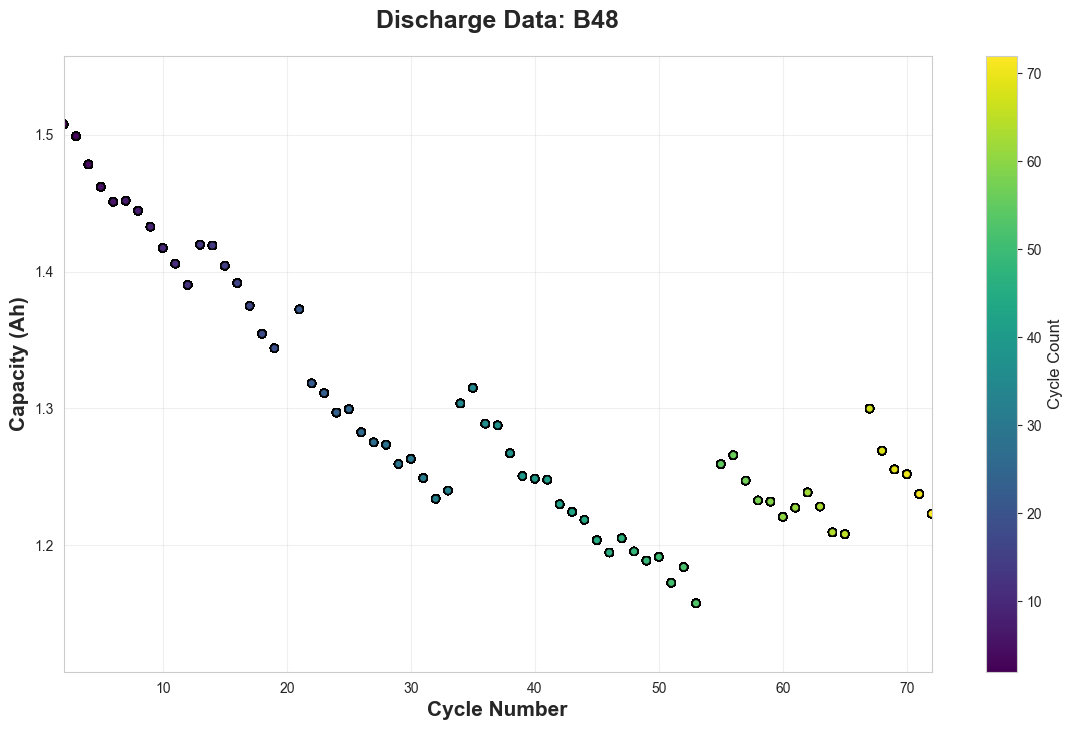

In [8]:
# for i in range(len(listdir)) :

#     dff = globals()['data_{}'.format(num[i])]
    
#     sns.set_style("darkgrid")
#     plt.figure(figsize=(12, 8))

#     plt.scatter(dff['cycle'], dff['capacity'])

#     plt.ylabel('Capacity', fontsize = 15)
#     plt.xlabel('cycle', fontsize = 15)
#     plt.title('Discharge_' + num[i], fontsize = 15)
#     plt.savefig('fig/Capacity_' + num[i] + '.jpg')
#     plt.show()
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for i in range(len(listdir)):

    dff = globals()['data_{}'.format(num[i])]
    
    # Configure the modern style
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 8))

    # Create scatter plot with a gradient color based on cycle values
    scatter = plt.scatter(
        dff['cycle'], 
        dff['capacity'], 
        c=dff['cycle'],  # Color gradient based on cycle
        cmap='viridis',  # Gradient color map
        edgecolor='k',   # Black border for each point
        s=30             # Point size
    )
    
    # Add a color bar for the gradient
    cbar = plt.colorbar(scatter)
    cbar.set_label('Cycle Count', fontsize=12)

    # Label axes and add a title with styling
    plt.ylabel('Capacity (Ah)', fontsize=15, fontweight='bold')
    plt.xlabel('Cycle Number', fontsize=15, fontweight='bold')
    plt.title(f'Discharge Data: {num[i]}', fontsize=18, fontweight='bold', pad=20)

    # Enhance gridlines and set limits
    plt.grid(alpha=0.3)
    plt.xlim(dff['cycle'].min(), dff['cycle'].max())
    plt.ylim(dff['capacity'].min() - 0.05, dff['capacity'].max() + 0.05)

    # Save the plot with better resolution and display it
    plt.savefig(f'fig/Capacity_{num[i]}.jpg', dpi=300, bbox_inches='tight')
    plt.show()


## 3. Visualiztion of SoH

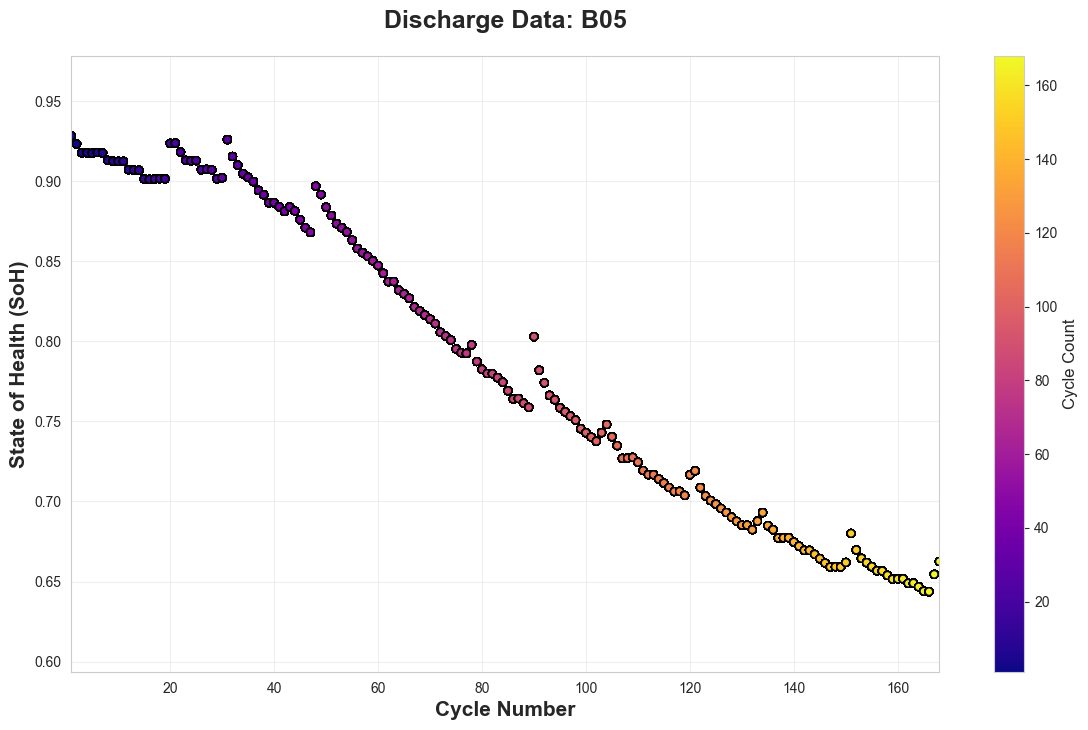

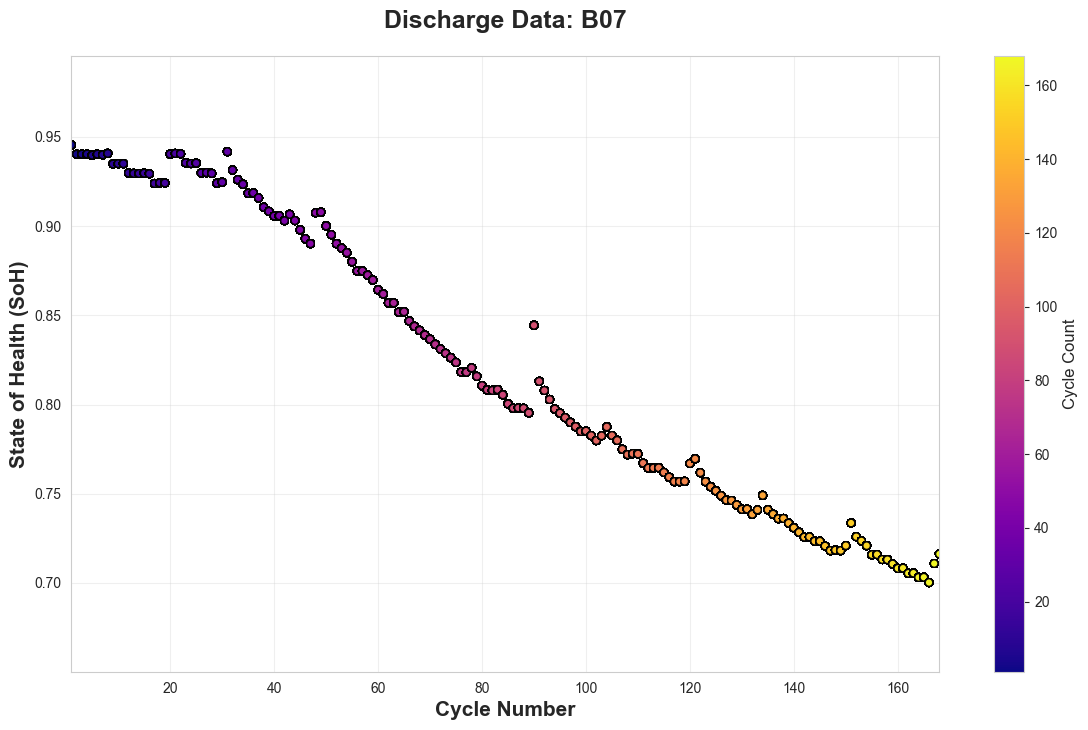

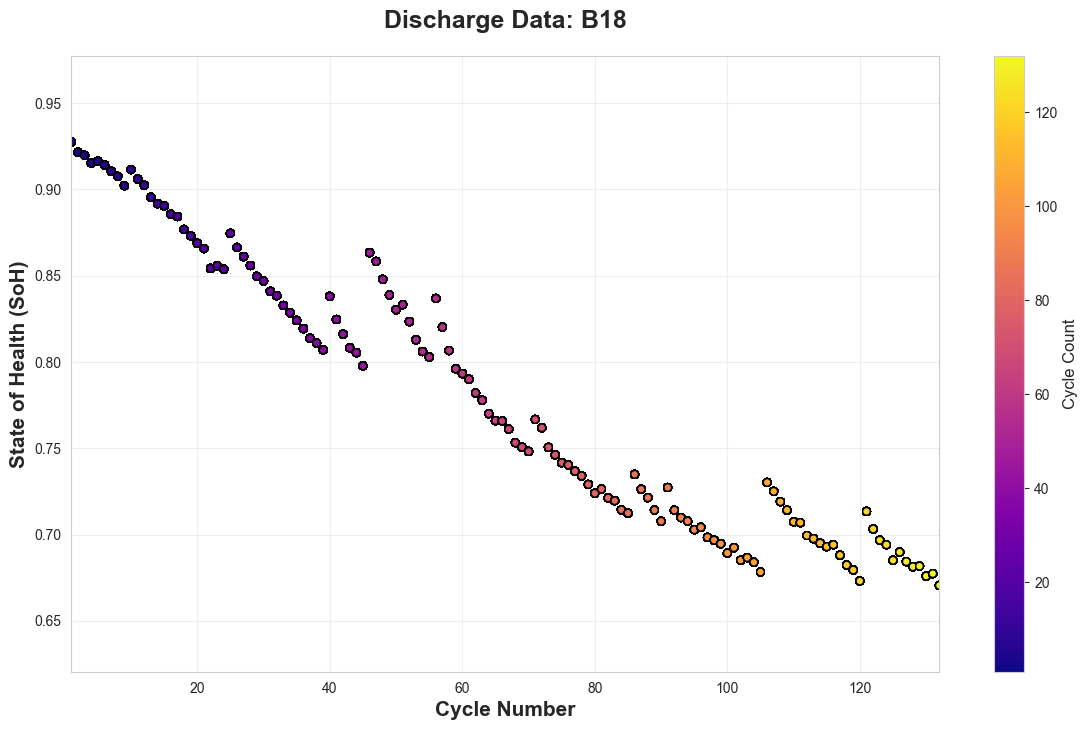

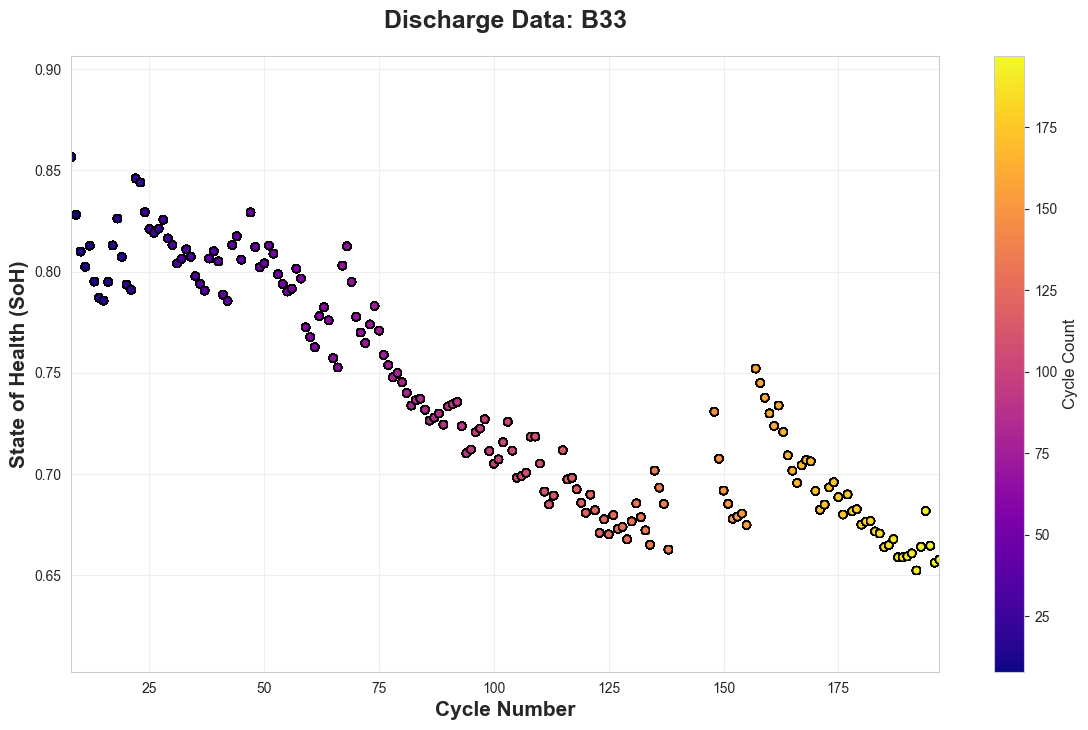

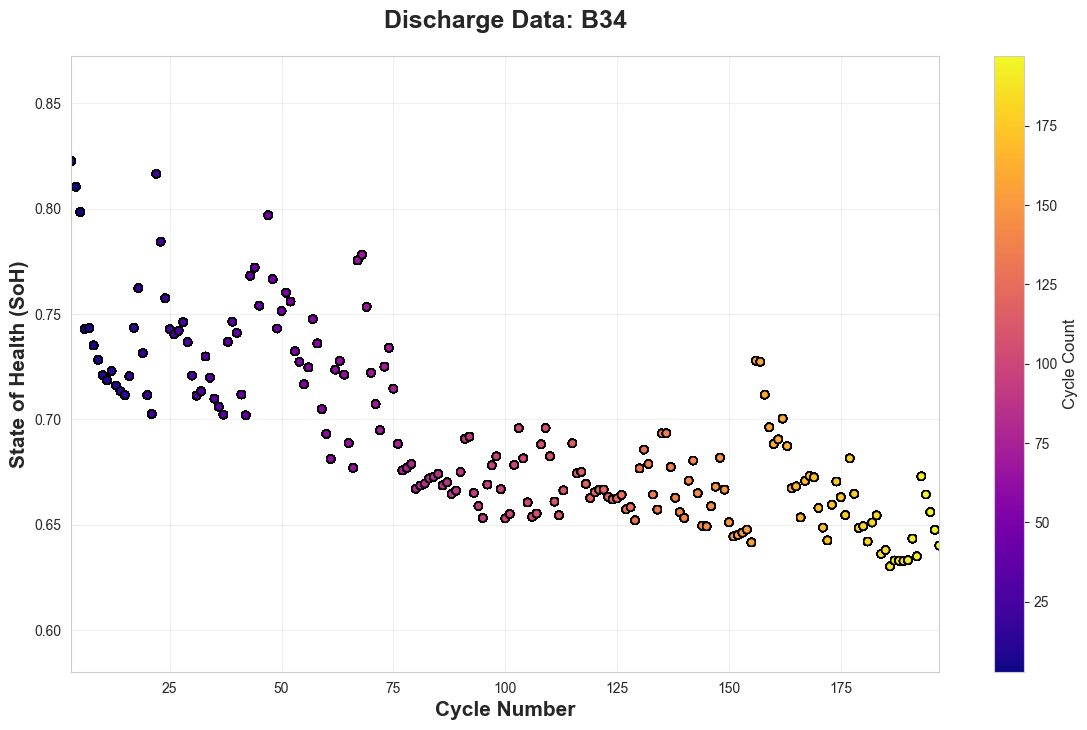

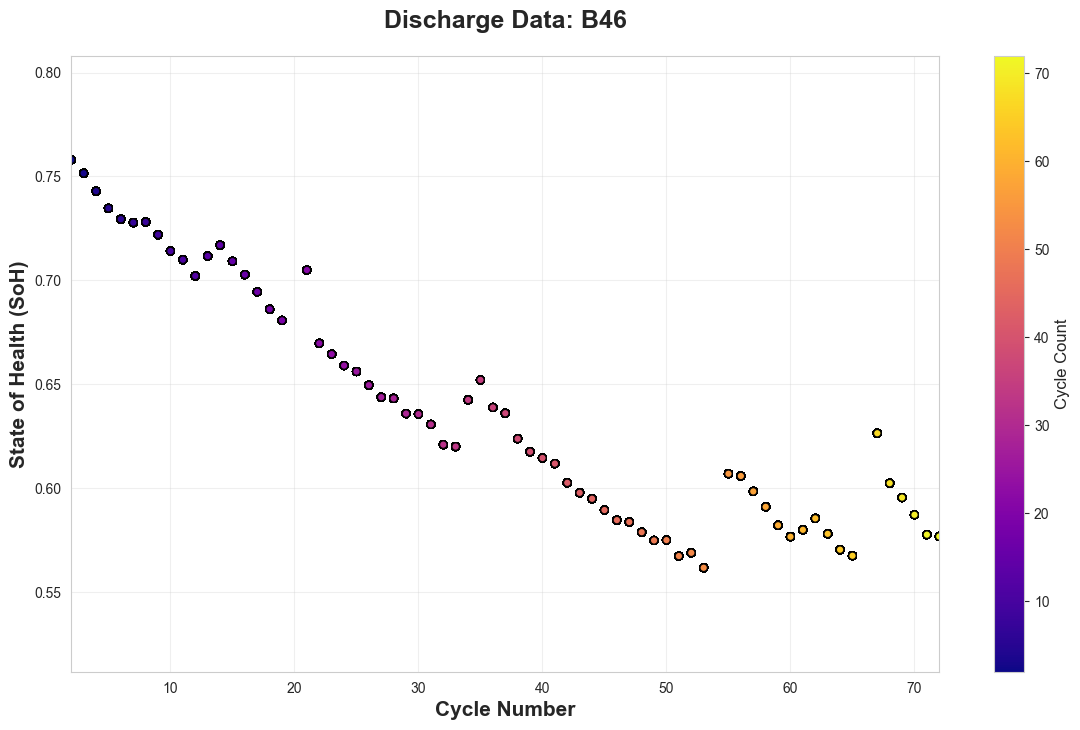

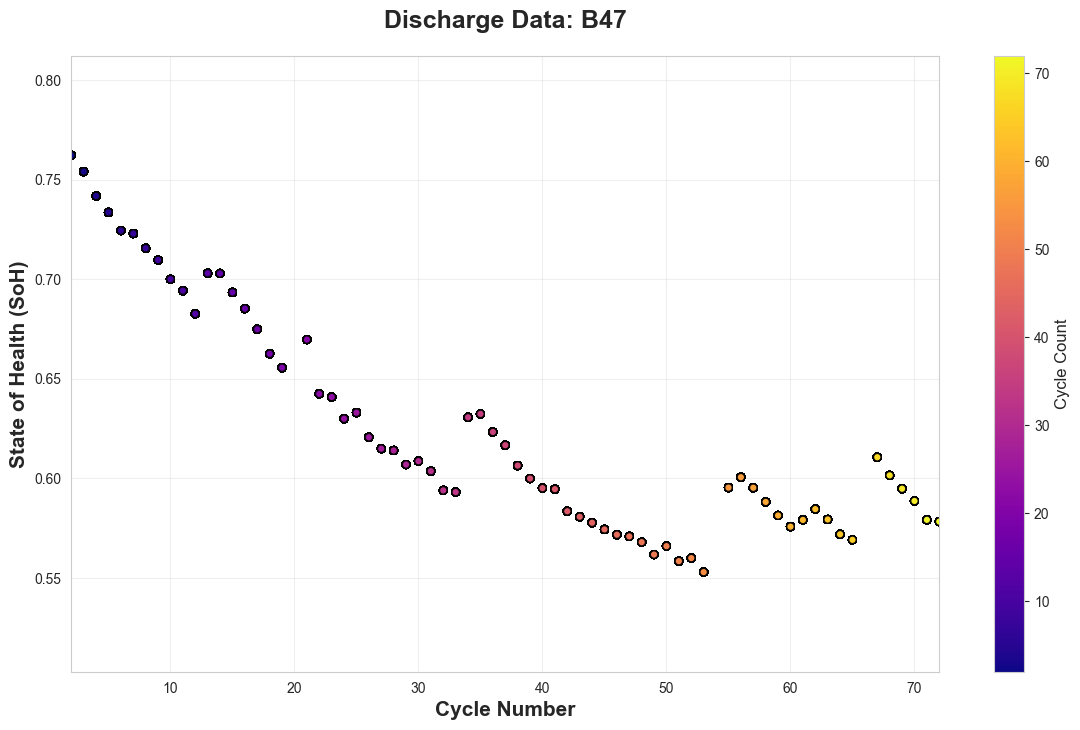

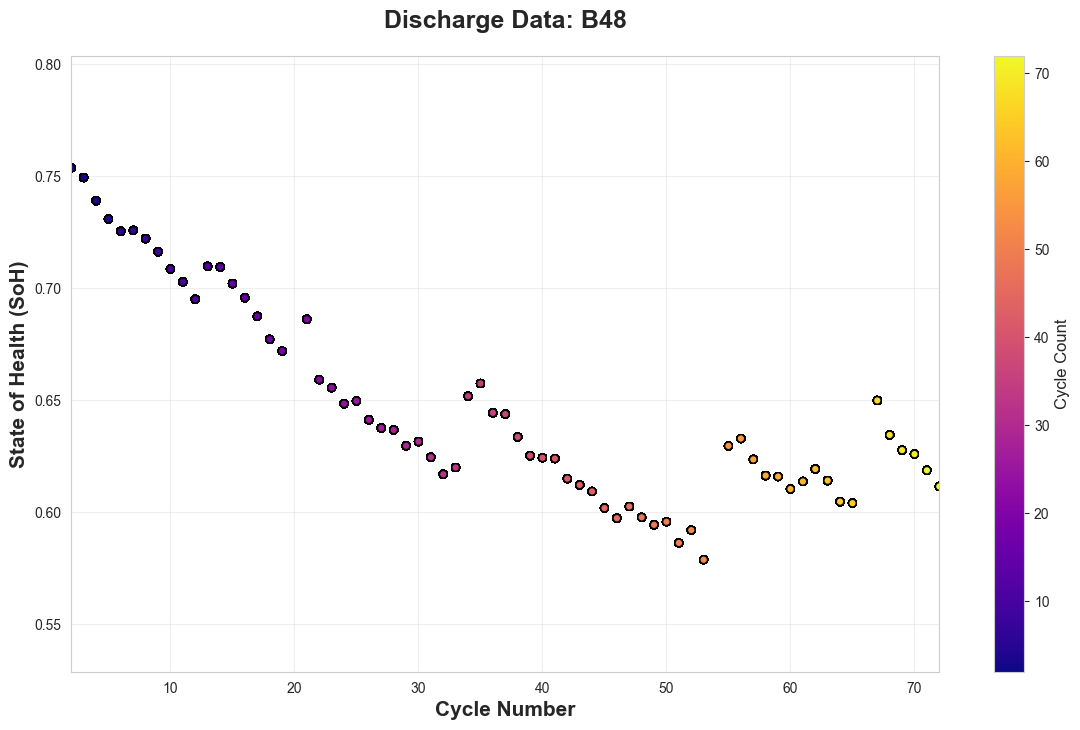

In [10]:
# for i in range(len(listdir)) :

#     dff = globals()['data_{}'.format(num[i])]
    
#     sns.set_style("darkgrid")
#     plt.figure(figsize=(12, 8))

#     plt.scatter(dff['cycle'], dff['SOH'])

#     plt.ylabel('SoH', fontsize = 15)
#     plt.xlabel('cycle', fontsize = 15)
#     plt.title('Discharge_' + num[i], fontsize = 15)
#     plt.savefig('fig/SoH_' + num[i] + '.jpg')
#     plt.show()
for i in range(len(listdir)):

    dff = globals()['data_{}'.format(num[i])]
    
    # Configure the modern style
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 8))

    # Create scatter plot with a gradient color based on cycle values
    scatter = plt.scatter(
        dff['cycle'], 
        dff['SOH'], 
        c=dff['cycle'],  # Color gradient based on cycle
        cmap='plasma',  # Gradient color map
        edgecolor='k',   # Black border for each point
        s=30             # Point size
    )
    
    # Add a color bar for the gradient
    cbar = plt.colorbar(scatter)
    cbar.set_label('Cycle Count', fontsize=12)

    # Label axes and add a title with styling
    plt.ylabel('State of Health (SoH)', fontsize=15, fontweight='bold')
    plt.xlabel('Cycle Number', fontsize=15, fontweight='bold')
    plt.title(f'Discharge Data: {num[i]}', fontsize=18, fontweight='bold', pad=20)

    # Enhance gridlines and set limits
    plt.grid(alpha=0.3)
    plt.xlim(dff['cycle'].min(), dff['cycle'].max())
    plt.ylim(dff['SOH'].min() - 0.05, dff['SOH'].max() + 0.05)

    # Save the plot with better resolution and display it
    plt.savefig(f'fig/SoH_{num[i]}.jpg', dpi=300, bbox_inches='tight')
    plt.show()
